# Using Party Affiliation to analyze the Supreme Court Decisions

In [405]:
# install dependencies
!pip install missingno

In [0]:
# import packages

# for handling data
import pandas as pd
import numpy as np
from scipy import stats

# preprocessing data
from sklearn.preprocessing import LabelEncoder
import missingno as msno

# charts and graphs
import matplotlib.pyplot as plt
import seaborn as sns

### Getting the Data

In [0]:
# grab the data from a csv file and put it into a dataframe
scdb_full = pd.read_csv("http://scdb.wustl.edu/_brickFiles/2018_01/SCDB_2018_01_caseCentered_Citation.csv.zip", encoding = 'ISO 8859-1', compression='zip')

In [0]:
# user-created data stored in dictionaries

houseParty = {1946: 'D', 1947: 'R', 1948: 'R', 1949: 'D', 1950: 'D', 1951: 'D', 1952: 'D', 1953: 'R', 1954: 'R', 1955: 'D', 1956: 'D', 1957: 'D', 1958: 'D', 1959: 'D', 1960: 'D', 1961: 'D', 1962: 'D', 1963: 'D', 1964: 'D', 1965: 'D', 1966: 'D', 1967: 'D', 1968: 'D', 1969: 'D', 1970: 'D', 1971: 'D', 1972: 'D', 1973: 'D', 1974: 'D', 1975: 'D', 1976: 'D', 1977: 'D', 1978: 'D', 1979: 'D', 1980: 'D', 1981: 'D', 1982: 'D', 1983: 'D', 1984: 'D', 1985: 'D', 1986: 'D', 1987: 'D', 1988: 'D', 1989: 'D', 1990: 'D', 1991: 'D', 1992: 'D', 1993: 'D', 1994: 'D', 1995: 'R', 1996: 'R', 1997: 'R', 1998: 'R', 1999: 'R', 2000: 'R', 2001: 'R', 2002: 'R', 2003: 'R', 2004: 'R', 2005: 'R', 2006: 'R', 2007: 'D', 2008: 'D', 2009: 'D', 2010: 'D', 2011: 'R', 2012: 'R', 2013: 'R', 2014: 'R', 2015: 'R', 2016: 'R', 2017: 'R', 2018: 'R'}
senateParty = {1946: 'D', 1947: 'R', 1948: 'R', 1949: 'D', 1950: 'D', 1951: 'D', 1952: 'D', 1953: 'R', 1954: 'R', 1955: 'D', 1956: 'D', 1957: 'D', 1958: 'D', 1959: 'D', 1960: 'D', 1961: 'D', 1962: 'D', 1963: 'D', 1964: 'D', 1965: 'D', 1966: 'D', 1967: 'D', 1968: 'D', 1969: 'D', 1970: 'D', 1971: 'D', 1972: 'D', 1973: 'D', 1974: 'D', 1975: 'D', 1976: 'D', 1977: 'D', 1978: 'D', 1979: 'D', 1980: 'D', 1981: 'R', 1982: 'R', 1983: 'R', 1984: 'R', 1985: 'R', 1986: 'R', 1987: 'D', 1988: 'D', 1989: 'D', 1990: 'D', 1991: 'D', 1992: 'D', 1993: 'D', 1994: 'D', 1995: 'R', 1996: 'R', 1997: 'R', 1998: 'R', 1999: 'R', 2000: 'R', 2001: 'D', 2002: 'D', 2003: 'R', 2004: 'R', 2005: 'R', 2006: 'R', 2007: 'D', 2008: 'D', 2009: 'D', 2010: 'D', 2011: 'D', 2012: 'D', 2013: 'D', 2014: 'D', 2015: 'R', 2016: 'R', 2017: 'R', 2018: 'R'}
presidentialParty = {1946: 'D', 1947: 'D', 1948: 'D', 1949: 'D', 1950: 'D', 1951: 'D', 1952: 'D', 1953: 'R', 1954: 'R', 1955: 'R', 1956: 'R', 1957: 'R', 1958: 'R', 1959: 'R', 1960: 'R', 1961: 'D', 1962: 'D', 1963: 'D', 1964: 'D', 1965: 'D', 1966: 'D', 1967: 'D', 1968: 'D', 1969: 'R', 1970: 'R', 1971: 'R', 1972: 'R', 1973: 'R', 1974: 'R', 1975: 'R', 1976: 'R', 1977: 'D', 1978: 'D', 1979: 'D', 1980: 'D', 1981: 'R', 1982: 'R', 1983: 'R', 1984: 'R', 1985: 'R', 1986: 'R', 1987: 'R', 1988: 'R', 1989: 'R', 1990: 'R', 1991: 'R', 1992: 'R', 1993: 'D', 1994: 'D', 1995: 'D', 1996: 'D', 1997: 'D', 1998: 'D', 1999: 'D', 2000: 'D', 2001: 'R', 2002: 'R', 2003: 'R', 2004: 'R', 2005: 'R', 2006: 'R', 2007: 'R', 2008: 'R', 2009: 'D', 2010: 'D', 2011: 'D', 2012: 'D', 2013: 'D', 2014: 'D', 2015: 'D', 2016: 'D', 2017: 'R', 2018: 'R'}
justicesParty = {1946: 0.0, 1947: 0.0, 1948: 0.0, 1949: 0.0, 1950: 0.0, 1951: 0.0, 1952: 0.0, 1953: 0.1111111111111111, 1954: 0.17349397590361446, 1955: 0.2222222222222222, 1956: 0.3964757709251101, 1957: 0.4444444444444444, 1958: 0.5531574740207834, 1959: 0.5555555555555556, 1960: 0.5555555555555556, 1961: 0.4943289224952741, 1962: 0.4444444444444444, 1963: 0.4444444444444444, 1964: 0.44481327800829873, 1965: 0.4444444444444444, 1966: 0.4444444444444444, 1967: 0.4444444444444444, 1968: 0.4605263157894737, 1969: 0.5137931034482759, 1970: 0.5555555555555556, 1971: 0.6524271844660194, 1972: 0.6666666666666666, 1973: 0.6666666666666666, 1974: 0.6666666666666666, 1975: 0.7718327183271833, 1976: 0.7777777777777778, 1977: 0.7777777777777778, 1978: 0.7777777777777778, 1979: 0.7777777777777778, 1980: 0.7777777777777778, 1981: 0.7777777777777778, 1982: 0.7777777777777778, 1983: 0.7777777777777778, 1984: 0.7777777777777778, 1985: 0.7777777777777778, 1986: 0.7777777777777778, 1987: 0.7733333333333333, 1988: 0.7777777777777778, 1989: 0.7777777777777778, 1990: 0.7775862068965518, 1991: 0.8886827458256029, 1992: 0.8897126969416126, 1993: 0.8888888888888888, 1994: 0.7777777777777778, 1995: 0.7777777777777778, 1996: 0.7777777777777778, 1997: 0.7777777777777778, 1998: 0.7777777777777778, 1999: 0.7774869109947644, 2000: 0.7774936061381074, 2001: 0.7777777777777778, 2002: 0.7777777777777778, 2003: 0.7790368271954674, 2004: 0.7777777777777778, 2005: 0.7777777777777778, 2006: 0.7771173848439822, 2007: 0.7777777777777778, 2008: 0.7777777777777778, 2009: 0.6654719235364397, 2010: 0.5555555555555556, 2011: 0.5555555555555556, 2012: 0.5555555555555556, 2013: 0.5555555555555556, 2014: 0.5555555555555556, 2015: 0.5135135135135135, 2016: 0.5369127516778524, 2017: 0.5555555555555556, 2018: 0.5555555555555556}

In [0]:
# create a year column from the 'dateDecision' column

full_date = scdb_full['dateDecision'].tolist()
year = []
for date in full_date:
    year.append(int(date[-4:]))
scdb_full['year'] = year

In [0]:
# map over the year column to create new columns with the appropriate data for each year

scdb_full['houseParty'] = scdb_full['year'].apply(lambda x:houseParty[x])
scdb_full['senateParty'] = scdb_full['year'].apply(lambda x:senateParty[x])
scdb_full['presidentialParty'] = scdb_full['year'].apply(lambda x:presidentialParty[x])
scdb_full['justicesParty'] = scdb_full['year'].apply(lambda x:justicesParty[x])

In [411]:
# check out all the features the scdb has

scdb_full.columns

Index(['caseId', 'docketId', 'caseIssuesId', 'voteId', 'dateDecision',
       'decisionType', 'usCite', 'sctCite', 'ledCite', 'lexisCite', 'term',
       'naturalCourt', 'chief', 'docket', 'caseName', 'dateArgument',
       'dateRearg', 'petitioner', 'petitionerState', 'respondent',
       'respondentState', 'jurisdiction', 'adminAction', 'adminActionState',
       'threeJudgeFdc', 'caseOrigin', 'caseOriginState', 'caseSource',
       'caseSourceState', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'declarationUncon', 'caseDisposition',
       'caseDispositionUnusual', 'partyWinning', 'precedentAlteration',
       'voteUnclear', 'issue', 'issueArea', 'decisionDirection',
       'decisionDirectionDissent', 'authorityDecision1', 'authorityDecision2',
       'lawType', 'lawSupp', 'lawMinor', 'majOpinWriter', 'majOpinAssigner',
       'splitVote', 'majVotes', 'minVotes', 'year', 'houseParty',
       'senateParty', 'presidentialParty', 'justicesParty'],
 

In [0]:
# we don't need every feature, so we'll create a new dataframe with only the
# features we want

scdb = scdb_full[['term', 
                  'chief', 
                  'petitioner', 
                  'respondent', 
                  'jurisdiction', 
                  'adminAction',
                  'caseOrigin',
                  'caseSource',
                  'certReason',
                  'lcDispositionDirection',
                  'issueArea',
                  'majVotes',
                  'minVotes',
                  'justicesParty',
                  'presidentialParty',
                  'houseParty',
                  'senateParty',
                  'decisionDirection',
                   ]]

### Viewing the Data

In [413]:
# take a quick look at the data

print(scdb.shape)

scdb.head()

(8893, 18)


,term,chief,petitioner,respondent,jurisdiction,adminAction,caseOrigin,caseSource,certReason,lcDispositionDirection,issueArea,majVotes,minVotes,justicesParty,presidentialParty,houseParty,senateParty,decisionDirection
0,1946,Vinson,198,172.0,6,NaN,51.0,29.0,11.0,1.0,8.0,8,1,0.0,D,D,D,2.0
1,1946,Vinson,100,27.0,1,NaN,123.0,30.0,4.0,1.0,1.0,6,3,0.0,D,D,D,1.0
2,1946,Vinson,209,27.0,2,66.0,107.0,107.0,1.0,2.0,8.0,5,4,0.0,D,D,D,2.0
3,1946,Vinson,27,170.0,1,67.0,3.0,3.0,10.0,2.0,2.0,5,3,0.0,D,D,D,2.0
4,1946,Vinson,27,176.0,1,NaN,3.0,3.0,2.0,2.0,8.0,6,3,0.0,D,D,D,2.0


In [0]:
# some functions to get statistics easily


def get_mode(data, column):
    
    return stats.mode(data[column])

def get_other_statistics(data, column):
    
    mean = data[column].mean()
    median = data[column].median()
    stdd = data[column].std()
    var = data[column].var()
    percentiles = np.percentile(data[column], [25, 50, 75])
    
    return {"Mean": mean, "Median": median, "Standard Deviation": stdd, 
            "Variance": var, "Percentiles": percentiles}

In [415]:
# most of the data is categorical

for column in scdb.columns:
    print(column, get_mode(scdb, column), '\n')

term ModeResult(mode=array([1967]), count=array([197])) 

chief ModeResult(mode=array(['Burger'], dtype=object), count=array([2809])) 

petitioner ModeResult(mode=array([28]), count=array([903])) 

respondent ModeResult(mode=array([28.]), count=array([1394])) 

jurisdiction ModeResult(mode=array([1]), count=array([7179])) 

adminAction ModeResult(mode=array([117.]), count=array([663])) 



/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


caseOrigin ModeResult(mode=array([302.]), count=array([1875])) 

caseSource ModeResult(mode=array([300.]), count=array([1674])) 

certReason ModeResult(mode=array([12.]), count=array([3171])) 

lcDispositionDirection ModeResult(mode=array([1.]), count=array([4847])) 

issueArea ModeResult(mode=array([1.]), count=array([2015])) 

majVotes ModeResult(mode=array([9]), count=array([2549])) 

minVotes ModeResult(mode=array([0]), count=array([3537])) 

justicesParty ModeResult(mode=array([0.77777778]), count=array([3095])) 

presidentialParty ModeResult(mode=array(['R'], dtype=object), count=array([4894])) 

houseParty ModeResult(mode=array(['D'], dtype=object), count=array([6779])) 

senateParty ModeResult(mode=array(['D'], dtype=object), count=array([6274])) 

decisionDirection ModeResult(mode=array([2.]), count=array([4467])) 



In [416]:
# these three columns are the only numeric ones

for column in scdb[['justicesParty', 'majVotes', 'minVotes']]:
    print(column, get_other_statistics(scdb, column))

justicesParty {'Mean': 0.5986553659328738, 'Median': 0.6666666666666666, 'Standard Deviation': 0.23962476367402152, 'Variance': 0.05742002736583066, 'Percentiles': array([0.46052632, 0.66666667, 0.77777778])}
majVotes {'Mean': 7.098279545710109, 'Median': 7.0, 'Standard Deviation': 1.5678572326466358, 'Variance': 2.458176301962367, 'Percentiles': array([6., 7., 9.])}
minVotes {'Mean': 1.584054874620488, 'Median': 1.0, 'Standard Deviation': 1.5335657785006933, 'Variance': 2.3518239969884376, 'Percentiles': array([0., 1., 3.])}


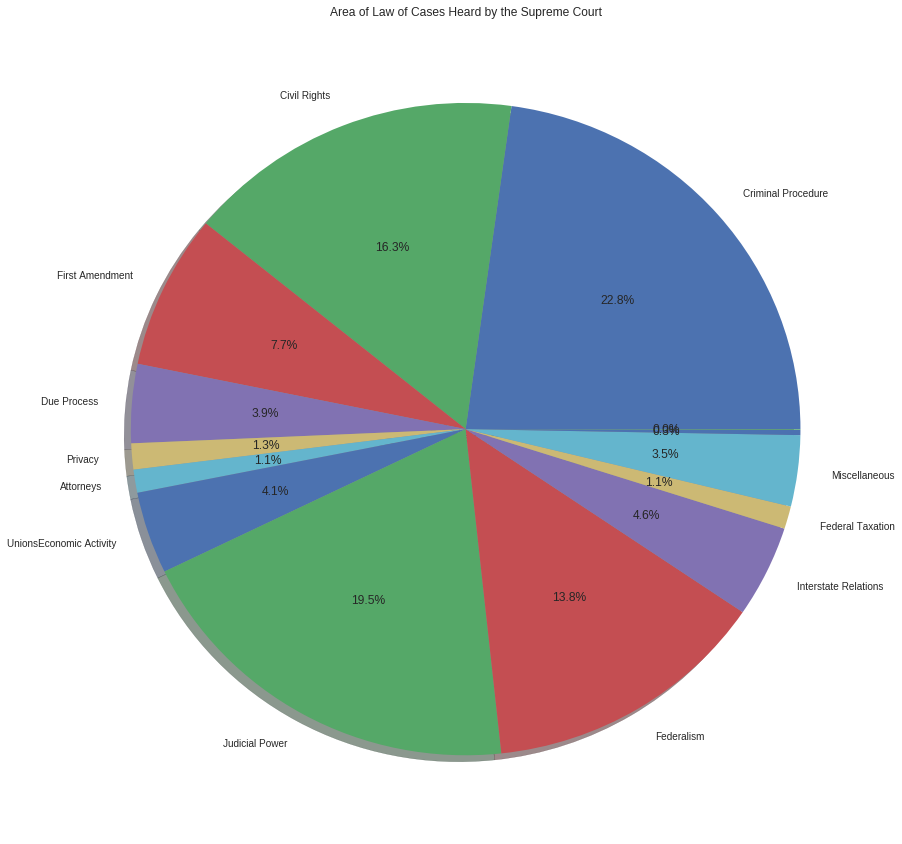

In [417]:
# a pie chart to show the different areas of law cases involve

list_names = ['Criminal Procedure', 'Civil Rights', 'First Amendment', 'Due Process', 'Privacy', 'Attorneys', 'Unions'
                  'Economic Activity', 'Judicial Power', 'Federalism', 'Interstate Relations', 'Federal Taxation',
                  'Miscellaneous', '', '']
labels = scdb['issueArea'].astype('category').cat.categories.tolist()
counts = scdb['issueArea'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
ax.pie(sizes, labels=list_names, autopct='%1.1f%%', shadow=True);
plt.title('Area of Law of Cases Heard by the Supreme Court');

In [0]:
# a simple function to make boxplots

def plot_boxplot(data, column, by_column):
    sns.boxplot(x = column, y = by_column, data = data).set_title('Boxplot of %s by %s' % (column, by_column))
    plt.show()
    plt.close()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


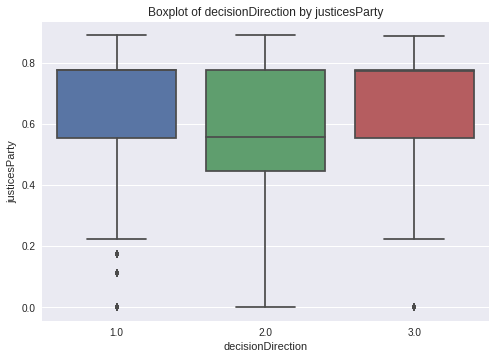

In [419]:
# boxplotting how the political makeup of the court affects decision outcome

plot_boxplot(scdb, 'decisionDirection', 'justicesParty');

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


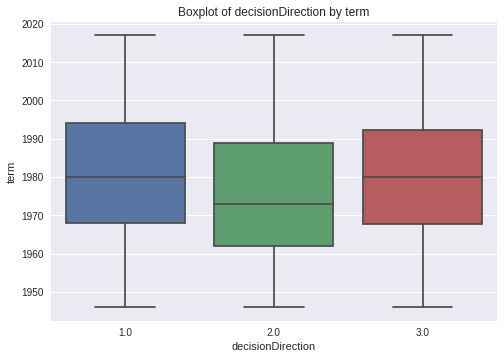

In [420]:
# plotting decision outcome over time

plot_boxplot(scdb, 'decisionDirection', 'term');

### Preprocessing

In [421]:
# check to see if there are any null values

scdb.isnull().any()

term                      False
chief                     False
petitioner                False
respondent                 True
jurisdiction              False
adminAction                True
caseOrigin                 True
caseSource                 True
certReason                 True
lcDispositionDirection     True
issueArea                  True
majVotes                  False
minVotes                  False
justicesParty             False
presidentialParty         False
houseParty                False
senateParty               False
decisionDirection          True
dtype: bool

In [422]:
# how many null values per feature?

for column in scdb.columns:
    if scdb[column].isnull().any() == True:
        print('Nans in column "' + column + '":', scdb[column].isnull().sum(), '\n\n')

Nans in column "respondent": 1 


Nans in column "adminAction": 6438 


Nans in column "caseOrigin": 344 


Nans in column "caseSource": 201 


Nans in column "certReason": 86 


Nans in column "lcDispositionDirection": 208 


Nans in column "issueArea": 60 


Nans in column "decisionDirection": 39 




In [0]:
# 'adminAction' only has values for about 1/3 of the data - might as well drop it completely

scdb = scdb.drop(columns=['adminAction'])

In [424]:
# what's the deal with this one missing value?

scdb[scdb['respondent'].isnull()]

,term,chief,petitioner,respondent,jurisdiction,caseOrigin,caseSource,certReason,lcDispositionDirection,issueArea,majVotes,minVotes,justicesParty,presidentialParty,houseParty,senateParty,decisionDirection
484,1949,Vinson,27,NaN,2,77.0,77.0,1.0,NaN,NaN,4,4,0.0,D,D,D,NaN


In [0]:
# turns out it loaded into the notebook wrong(???), but it can be corrected by hand

scdb.at[484, 'respondent'] = 231

In [0]:
# we are trying to predict 'decisionDirection', it's best to drop all the rows
# with null values here instead of imputing them

scdb = scdb.dropna(subset=['decisionDirection'])

In [427]:
# that leaves us with a lot of data still

print(scdb['decisionDirection'].value_counts())

2.0    4467
1.0    4239
3.0     148
Name: decisionDirection, dtype: int64


In [0]:
# drop 148 more rows because '3.0' means unspecified

scdb = scdb[scdb['decisionDirection'] != 3]

In [0]:
# it's easier to switch the dependent variable to 0s and 1s now, for easy scoring later

scdb['decisionDirection'] = scdb['decisionDirection'].replace(2.0, 0.0)

In [430]:
# how many rows are left?

scdb.shape

(8706, 17)

In [431]:
# here, I am looking for how common the mode is for each feature with null values

for column in scdb.columns:
    if scdb[column].isnull().any() == True:
        print(column, scdb[column].value_counts(), '\n\n')

caseOrigin 302.0    1856
96.0      444
55.0      415
66.0      315
50.0      225
48.0      224
109.0     149
51.0      143
32.0      134
80.0      120
126.0     119
3.0       110
58.0      109
94.0      108
92.0      107
9.0       106
81.0      101
121.0     101
75.0       97
300.0      89
120.0      88
103.0      85
45.0       85
52.0       84
122.0      82
104.0      82
60.0       81
86.0       81
79.0       77
129.0      76
         ... 
78.0       12
101.0      10
76.0        9
5.0         9
155.0       8
31.0        8
153.0       8
130.0       7
1.0         7
62.0        6
125.0       5
160.0       4
156.0       3
2.0         3
20.0        3
6.0         3
163.0       2
17.0        2
7.0         2
15.0        1
10.0        1
152.0       1
151.0       1
154.0       1
157.0       1
150.0       1
102.0       1
158.0       1
161.0       1
16.0        1
Name: caseOrigin, Length: 134, dtype: int64 


caseSource 300.0    1651
29.0     1037
25.0      665
22.0      624
26.0      482
32.0   

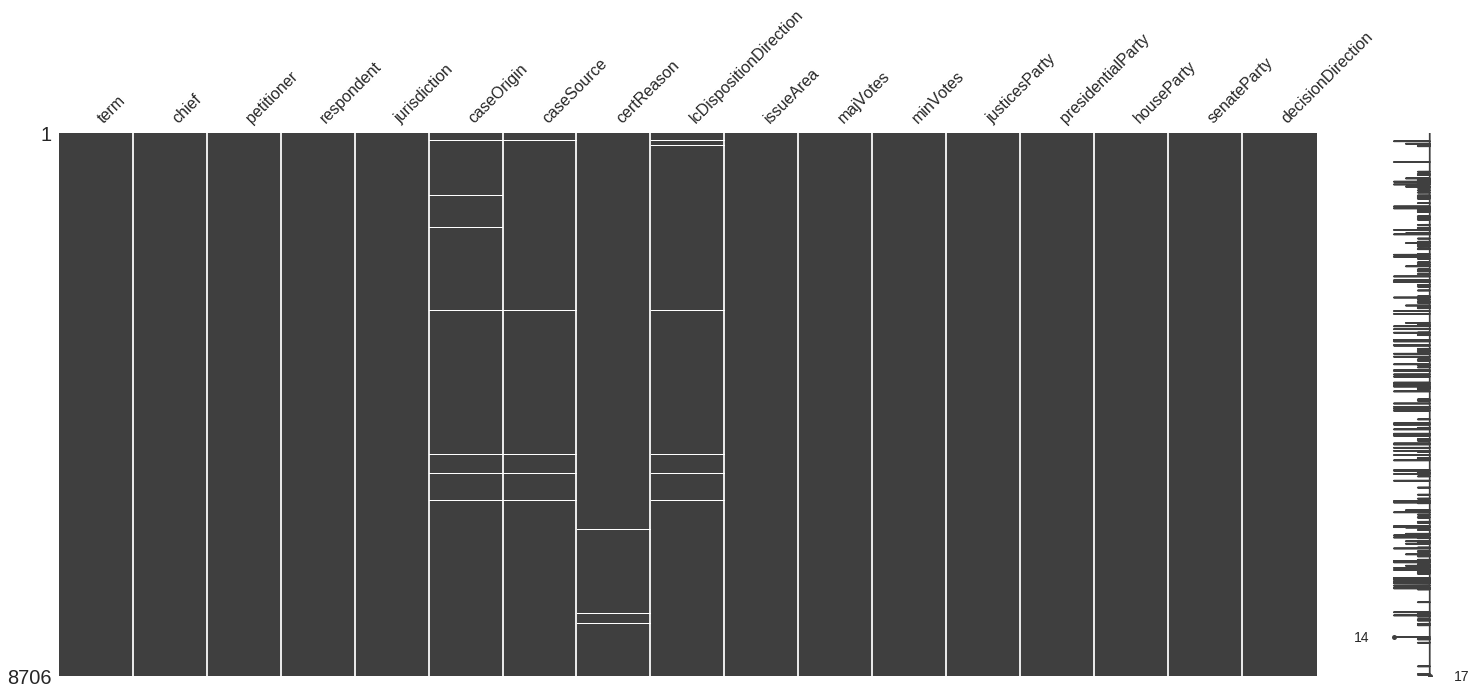

In [432]:
# missingno makes it easy to see where the nulls are located in you dataset

msno.matrix(scdb);

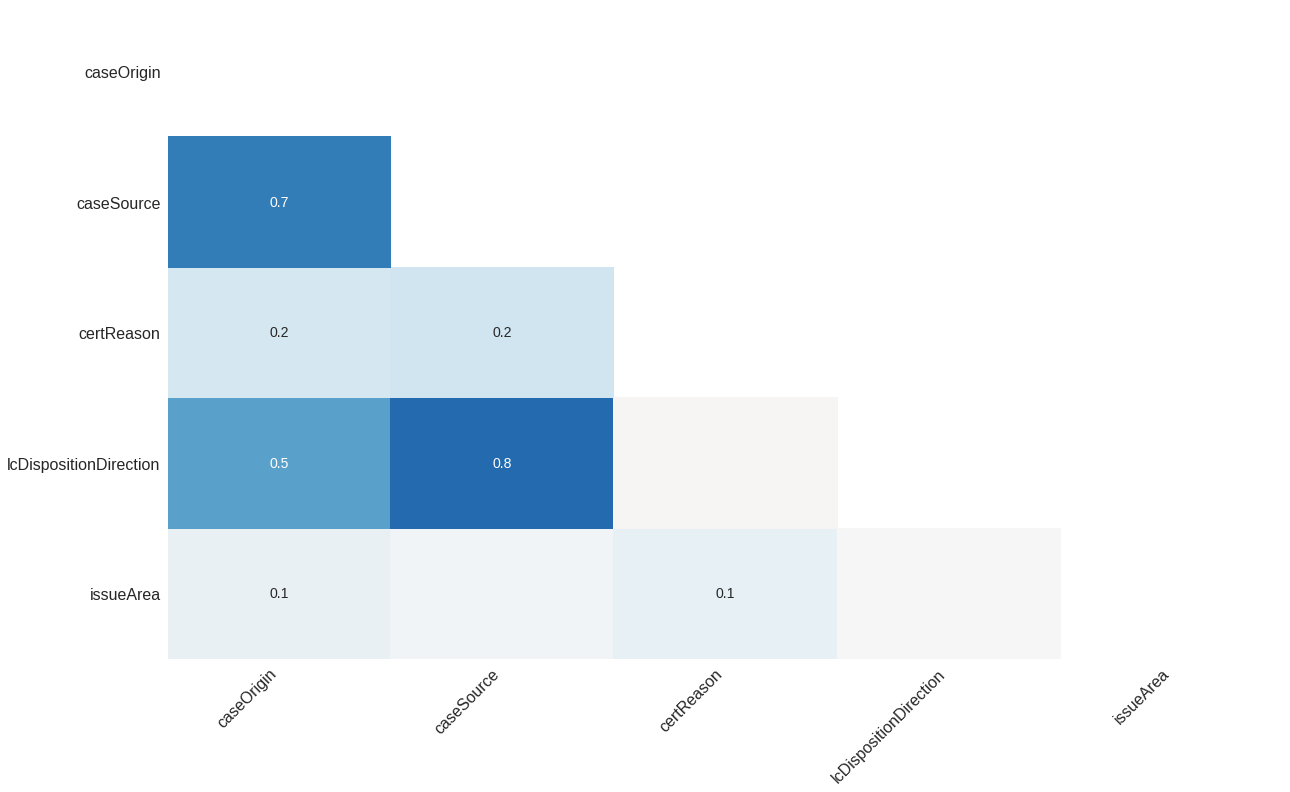

In [433]:
# the null values tend to be in the same rows for 'caseSource' and 'caseOrigin'

msno.heatmap(scdb);

In [0]:
# create a function to fill columns with the mode of that column

def fill_with_mode(data, column):
    most_common = data[column].value_counts().idxmax()
    return data[column].fillna(most_common)

In [0]:
# fill all of the nulls with the mode

for column in scdb.columns:
    if scdb[column].isnull().any() == True:
        scdb[column] = fill_with_mode(scdb, column)

In [436]:
# sanity check for any existing null values (there shouldn't be any)

for column in scdb.columns:
    print(column, scdb[column].isnull().sum())

term 0
chief 0
petitioner 0
respondent 0
jurisdiction 0
caseOrigin 0
caseSource 0
certReason 0
lcDispositionDirection 0
issueArea 0
majVotes 0
minVotes 0
justicesParty 0
presidentialParty 0
houseParty 0
senateParty 0
decisionDirection 0


In [437]:
# to run the model in the classifiers, datatypes need to be ints or floats

for column in scdb.columns:
    print(column, scdb[column].dtype)

term int64
chief object
petitioner int64
respondent float64
jurisdiction int64
caseOrigin float64
caseSource float64
certReason float64
lcDispositionDirection float64
issueArea float64
majVotes int64
minVotes int64
justicesParty float64
presidentialParty object
houseParty object
senateParty object
decisionDirection float64


In [0]:
# sklearn's LabelEncoder will be used to turn the rest of the columns into ints

label_enc = LabelEncoder()
for column in scdb.columns:
    if scdb[column].dtype == 'object': 
        scdb[column] = label_enc.fit_transform(scdb[column])

In [439]:
# double check
print(scdb)

      term  chief  petitioner  respondent  jurisdiction  caseOrigin  \
0     1946      3         198       172.0             6        51.0   
1     1946      3         100        27.0             1       123.0   
2     1946      3         209        27.0             2       107.0   
3     1946      3          27       170.0             1         3.0   
4     1946      3          27       176.0             1         3.0   
5     1946      3         198         4.0             2       302.0   
6     1946      3         148       405.0             1        21.0   
7     1946      3         189       189.0             1        54.0   
8     1946      3           4       248.0             1        44.0   
9     1946      3         135       114.0             1        73.0   
10    1946      3         126        28.0             1       302.0   
11    1946      3         100        27.0             1        51.0   
12    1946      3          27       137.0             1        92.0   
13    

### Running the Classifiers

In [0]:
# import the classifiers and metrics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import sklearn.model_selection as ms

In [0]:
# function run_classifiers will run all three classifiers on the data and output
# the AUC Score and graphs

def run_classifiers(data, label, test_size=.2, random_state=36):
    y = data[label]
    X = data.drop(columns=[label])
    X_train, X_test, y_train, y_test = train_test_and_split(X, y)
    
    rfc = RandomForestClassifier(max_features='log2', random_state=36, n_estimators = 100, warm_start = True)
    lr = LogisticRegression()
    dtc = DecisionTreeClassifier()
    classifiers = [rfc, lr, dtc]
    
    for model in classifiers:
        fpr, tpr, threshholds, auc_score = fit_predict_scores(model, X_train, X_test, y_train, y_test)
        plt.plot(fpr,tpr)
        print('Model:', model, 'AUC SCORE:', auc_score)
    plt.show()  
    plt.close()
        
def train_test_and_split(X, y, test_size=.2, random_state=36):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def fit_predict_scores(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fpr, tpr, threshholds = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    return fpr, tpr, threshholds, auc_score
    

Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=36, verbose=0, warm_start=True) AUC SCORE: 0.6933026762136171
Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) AUC SCORE: 0.638603712341644
Model: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
   

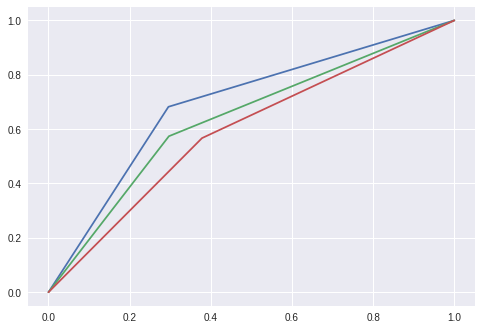

In [473]:
# Use the classifiers on the data with the political features
run_classifiers(scdb, 'decisionDirection')

In [0]:
# Use the classifiers on the data without the political features
scdb_null = scdb.drop(columns=['presidentialParty', 'houseParty', 'senateParty', 'justicesParty'])

Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=36, verbose=0, warm_start=True) AUC SCORE: 0.6880956681437105
Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) AUC SCORE: 0.644943223242808
Model: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
   

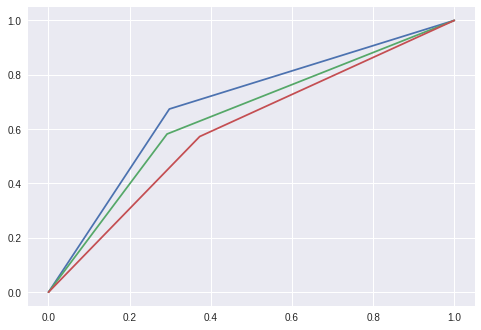

In [476]:
run_classifiers(scdb_null, 'decisionDirection')